# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [2]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [22]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape
app_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [23]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [24]:
app_train['DAYS_BIRTH']

0         -9461
1        -16765
2        -19046
3        -19005
4        -19932
          ...  
307506    -9327
307507   -20775
307508   -14966
307509   -11961
307510   -16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [26]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['YEAR_BIRTH'] = abs(app_train['DAYS_BIRTH']) / 365
app_train['YEAR_BIRTH']

0         25.920548
1         45.931507
2         52.180822
3         52.068493
4         54.608219
            ...    
307506    25.553425
307507    56.917808
307508    41.002740
307509    32.769863
307510    46.180822
Name: YEAR_BIRTH, Length: 307511, dtype: float64

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [30]:
income = app_train[['TARGET', 'AMT_INCOME_TOTAL']]
income['equal_cut_AMT_INCOME_TOTAL'] = pd.qcut(income['AMT_INCOME_TOTAL'], 10)
income['equal_cut_AMT_INCOME_TOTAL'].value_counts()
income

C:\Users\donny\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,TARGET,AMT_INCOME_TOTAL,equal_cut_AMT_INCOME_TOTAL
0,1,202500.0,"(180000.0, 225000.0]"
1,0,270000.0,"(225000.0, 270000.0]"
2,0,67500.0,"(25649.999, 81000.0]"
3,0,135000.0,"(112500.0, 135000.0]"
4,0,121500.0,"(112500.0, 135000.0]"
...,...,...,...
307506,0,157500.0,"(147150.0, 162000.0]"
307507,0,72000.0,"(25649.999, 81000.0]"
307508,0,153000.0,"(147150.0, 162000.0]"
307509,1,171000.0,"(162000.0, 180000.0]"


In [37]:
a = income.groupby(['equal_cut_AMT_INCOME_TOTAL']).mean()
a

,TARGET,AMT_INCOME_TOTAL
equal_cut_AMT_INCOME_TOTAL,,
"(25649.999, 81000.0]",0.081908,66254.124685
"(81000.0, 99000.0]",0.082232,91089.278813
"(99000.0, 112500.0]",0.087192,111333.276330
"(112500.0, 135000.0]",0.084894,131852.488657
"(135000.0, 147150.0]",0.090007,142953.056026
"(147150.0, 162000.0]",0.086407,157141.512098
"(162000.0, 180000.0]",0.084224,178061.632269
"(180000.0, 225000.0]",0.078065,212733.495347
"(225000.0, 270000.0]",0.070401,259491.085277


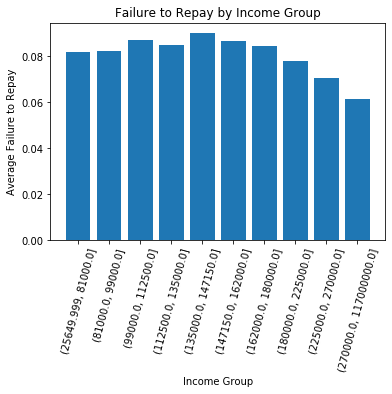

In [41]:
plt.bar(range(len(a.index)), a['TARGET'])
plt.xticks(range(len(a.index)), a.index, rotation = 75); plt.xlabel('Income Group'); plt.ylabel('Average Failure to Repay')
plt.title('Failure to Repay by Income Group');

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

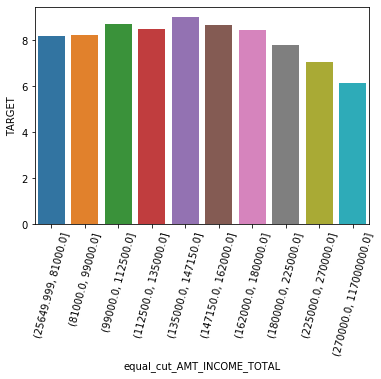

In [48]:
import seaborn as sns
sns.barplot(a.index, a['TARGET'] * 100)
plt.xticks(rotation = 75)